In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style
import os
import sys
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True)

In [546]:
df = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [547]:
print(Fore.YELLOW, "Loading data information ...", Style.RESET_ALL)
df.info()

 Loading data information ... 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   objec

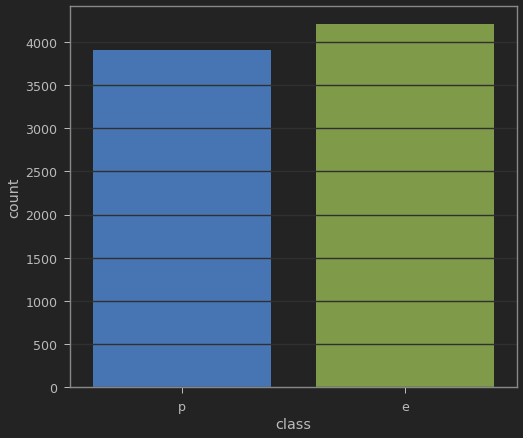

In [548]:
# Check class distribution
sns.countplot(x="class", data=df)

# Data Processing

In [549]:
for cols in df.columns:
    unique_values = df[cols].unique()
    print(Fore.YELLOW, f"Number of unique values in '{cols}':", Style.RESET_ALL, len(unique_values))

 Number of unique values in 'class':  2
 Number of unique values in 'cap-shape':  6
 Number of unique values in 'cap-surface':  4
 Number of unique values in 'cap-color':  10
 Number of unique values in 'bruises':  2
 Number of unique values in 'odor':  9
 Number of unique values in 'gill-attachment':  2
 Number of unique values in 'gill-spacing':  2
 Number of unique values in 'gill-size':  2
 Number of unique values in 'gill-color':  12
 Number of unique values in 'stalk-shape':  2
 Number of unique values in 'stalk-root':  5
 Number of unique values in 'stalk-surface-above-ring':  4
 Number of unique values in 'stalk-surface-below-ring':  4
 Number of unique values in 'stalk-color-above-ring':  9
 Number of unique values in 'stalk-color-below-ring':  9
 Number of unique values in 'veil-type':  1
 Number of unique values in 'veil-color':  4
 Number of unique values in 'ring-number':  3
 Number of unique values in 'ring-type':  5
 Number of unique values in 'spore-print-color':  9
 Nu

In [550]:
X, Y = df.drop("class", axis=1), df["class"]

In [551]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for i in X.columns:
    X[i] = label_encoder.fit_transform(X[i])
    
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)


In [552]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [553]:
Y

array([1, 0, 0, ..., 0, 1, 0])

## Poisonous = 1 
## Edible = 0

In [554]:
X = pd.get_dummies(X, columns=X.columns, drop_first=True)
X.head(5)

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [555]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [556]:
from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
Xtrain = stsc.fit_transform(Xtrain)
Xtest = stsc.transform(Xtest)

In [557]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [558]:
D = X.shape[1]

Ytrain = Ytrain.reshape(-1, 1)
Ytest = Ytest.reshape(-1, 1)

print(Fore.YELLOW, "Shapes for Training Data....", Style.RESET_ALL)
print(f"Shape of Xtrain : {Xtrain.shape}")
print(f"Shape of Ytrain : {Ytrain.shape}")


print(Fore.BLUE, "Shapes for Testing Data....", Style.RESET_ALL)
print(f"Shape of Xtest : {Xtest.shape}")
print(f"Shape of Ytest : {Ytest.shape}")

 Shapes for Training Data.... 
Shape of Xtrain : (5686, 2)
Shape of Ytrain : (5686, 1)
 Shapes for Testing Data.... 
Shape of Xtest : (2438, 2)
Shape of Ytest : (2438, 1)


In [559]:
print(Fore.YELLOW, "Creating PyTorch Datasets for computation")

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(Xtrain.astype(np.float32)), torch.from_numpy(Ytrain.astype(np.float32)))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(Xtest.astype(np.float32)), torch.from_numpy(Ytest.astype(np.float32)))

 Creating PyTorch Datasets for computation


In [560]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Logistic Model

In [611]:
class Logistic(nn.Module):
    
    def __init__(self, n_units, n_classes):
        
        super(Logistic, self).__init__()
        
        self.seq = nn.Sequential(nn.Linear(n_units, n_classes), nn.Sigmoid())
        
    def forward(self, X):
        X = self.seq(X)
        
        return X

In [612]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [613]:
logregmodel = Logistic(Xtrain.shape[1], 1)
logregmodel.to(device)

Logistic(
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [614]:
# Define the loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(logregmodel.parameters())

In [615]:
# Define the training loop 
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=20):
    
    """
    ----------------------------------------------------
    Description : Function to do batch gradient descent 
                  on the input dataset
                  
    Arguments :
    
    model -- a pytorch model 
    criterion -- a pytorch module which contains the loss
    optimizer -- a pytorcch module which contains the optimizers used for batch gradient descent
    train_loader -- a pytorch dataloader representing the training set
    test_loader -- a pytorch dataloader representing the testing set
    epochs -- an integer representing the number of training loops to go through
    
    Return :
    
    train_losses -- a numpy array containing the loss values encountered during training
    test_losses -- a numpy array containing the loss values encountered during validation
    
    Usage :
    
    train_loss, test_val = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=10000)
    
    -------------------------------------------------------    
    
    """
    
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for epoch in range(epochs):
        
        train_loss = []
        
        for inputs, targets in train_loader:
            
            # Move the inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Zero-initiialize the optimizer gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            loss.backward()
            optimizer.step()
            
            
            train_loss.append(loss.item())
            
        
        test_loss = []
        
        for inputs, targets in test_loader:
            
            # Move the inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss.append(loss.item())
            
        
        train_loss = np.mean(train_loss)
        test_loss = np.mean(test_loss)
        
        train_losses[epoch] = train_loss
        test_losses[epoch] = test_loss
        
        print(f"Epoch : {epoch+1}/{epochs} | Train Loss : {train_loss} | Test Loss : {test_loss}")
            
        
    return train_losses, test_losses
            
            

In [616]:
train_losses, test_losses = batch_gd(logregmodel, criterion, optimizer, train_loader, test_loader, epochs=200)

Epoch : 1/200 | Train Loss : 1.851574190457662 | Test Loss : 1.792438542842865
Epoch : 2/200 | Train Loss : 1.739101963573032 | Test Loss : 1.6790410101413726
Epoch : 3/200 | Train Loss : 1.6294688701629638 | Test Loss : 1.5698787808418273
Epoch : 4/200 | Train Loss : 1.5208933115005494 | Test Loss : 1.4654899895191194
Epoch : 5/200 | Train Loss : 1.4212785773807102 | Test Loss : 1.367251694202423
Epoch : 6/200 | Train Loss : 1.3229001389609443 | Test Loss : 1.273993468284607
Epoch : 7/200 | Train Loss : 1.2352540175120035 | Test Loss : 1.187018084526062
Epoch : 8/200 | Train Loss : 1.1502500189675224 | Test Loss : 1.1061046540737152
Epoch : 9/200 | Train Loss : 1.0726744956440395 | Test Loss : 1.0316779613494873
Epoch : 10/200 | Train Loss : 1.0001563562287226 | Test Loss : 0.9636304497718811
Epoch : 11/200 | Train Loss : 0.9347223122914632 | Test Loss : 0.9017061948776245
Epoch : 12/200 | Train Loss : 0.8762621336513096 | Test Loss : 0.8458958059549332
Epoch : 13/200 | Train Loss : 0

Epoch : 101/200 | Train Loss : 0.33267771601676943 | Test Loss : 0.34330601170659064
Epoch : 102/200 | Train Loss : 0.33013641304439967 | Test Loss : 0.34326371625065805
Epoch : 103/200 | Train Loss : 0.32966520455148485 | Test Loss : 0.3432167895138264
Epoch : 104/200 | Train Loss : 0.3296766714917289 | Test Loss : 0.3431777603924274
Epoch : 105/200 | Train Loss : 0.33203654885292055 | Test Loss : 0.3431415520608425
Epoch : 106/200 | Train Loss : 0.3311235338449478 | Test Loss : 0.3431118577718735
Epoch : 107/200 | Train Loss : 0.32899389564991 | Test Loss : 0.34308169931173327
Epoch : 108/200 | Train Loss : 0.33081871403588187 | Test Loss : 0.3430616490542889
Epoch : 109/200 | Train Loss : 0.3296509951353073 | Test Loss : 0.34303373843431473
Epoch : 110/200 | Train Loss : 0.3311799907022052 | Test Loss : 0.3430195517838001
Epoch : 111/200 | Train Loss : 0.3309606240855323 | Test Loss : 0.34301029071211814
Epoch : 112/200 | Train Loss : 0.32988369630442727 | Test Loss : 0.342990596592

Epoch : 200/200 | Train Loss : 0.32808155947261386 | Test Loss : 0.34329389184713366


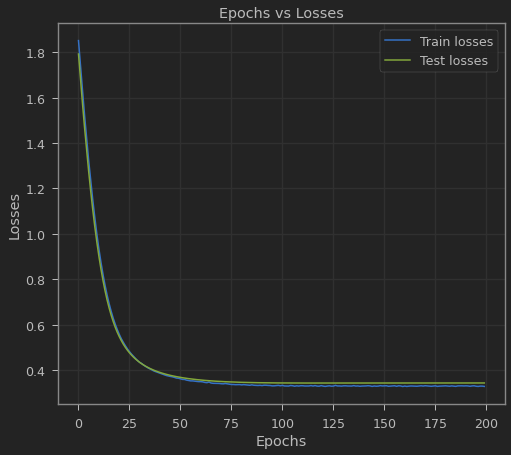

In [617]:
plt.title("Epochs vs Losses")
plt.plot(train_losses, label="Train losses")
plt.plot(test_losses, label="Test losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

In [620]:
# Get the model accuracy

def get_accuracy(evalmodel, train_loader, test_loader):
    
    """
    -----------------------------------------------
    Description : To calculate the accuracy rate of the model
    
    Arguments :
    
    model : a pytorch model 
    train_loader : a pytorch data loader representing the training set
    test_loader : a pytorch data loader representing the testing set
    
    Return:
    
    train_acc : a float value representing the training accuracy of the model
    test_acc : a float value representing the testing accuracy of the model
    
    
    Usage :
    
    trainAcc, testAcc = get_accuracy(model, train_loader, test_loader)
    --------------------------------------------------
    
    """
    
    
    n_correct = 0
    n_total = 0
    
    for inputs, targets in train_loader:
        
        # move targets to the device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = evalmodel(inputs).detach().numpy()
        
        n_correct += np.mean(targets.detach().numpy() == np.round(outputs))
        
        n_total += 1
        
    
    train_acc = n_correct / n_total
    
    
    for inputs, targets in test_loader:
        
        # move targets to the device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = evalmodel(inputs).detach().numpy()
        
        n_correct += np.mean(targets.detach().numpy() == np.round(outputs))
        n_total += 1
        
    
    test_acc = n_correct / n_total
    
    
    return train_acc, test_acc
        
        

In [621]:
train_acc , test_acc = get_accuracy(logregmodel, train_loader, test_loader)

print(f"Training Accuracy : {train_acc} || Testing Accuracy : {test_acc}")

Training Accuracy : 0.9052147633744857 || Testing Accuracy : 0.9058938746438747


The Logistic Model seems to be a pretty good model. But let's see what an ANN can do in comparison to the logistic model.

# Artificial Neural Network

In [622]:
class ANN(nn.Module):
    
    def __init__(self, n_features, n_classes):
        
        super(ANN, self).__init__()
        
        self.dense = nn.Sequential(
                nn.Linear(n_features, 20),
                nn.ReLU(),
                nn.Linear(20, 10),
                nn.ReLU(),
                nn.Linear(10, n_classes),
                nn.Sigmoid()
        )
        
    def forward(self, X):
        
        X = self.dense(X)
        
        return X

In [623]:
annmodel = ANN(Xtrain.shape[1], 1)
annmodel.to(device)

ANN(
  (dense): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [624]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(annmodel.parameters())

In [625]:
train_losses, test_losses = batch_gd(annmodel, criterion, optimizer, train_loader, test_loader, epochs=100)

Epoch : 1/100 | Train Loss : 0.6065223495165507 | Test Loss : 0.516412752866745
Epoch : 2/100 | Train Loss : 0.44226572381125556 | Test Loss : 0.3839222863316536
Epoch : 3/100 | Train Loss : 0.3435684535238478 | Test Loss : 0.32620092406868934
Epoch : 4/100 | Train Loss : 0.3085000465313594 | Test Loss : 0.30810667797923086
Epoch : 5/100 | Train Loss : 0.2965508931212955 | Test Loss : 0.2994041763246059
Epoch : 6/100 | Train Loss : 0.28878221213817595 | Test Loss : 0.2933108888566494
Epoch : 7/100 | Train Loss : 0.2824027611149682 | Test Loss : 0.28753732815384864
Epoch : 8/100 | Train Loss : 0.2787212196323607 | Test Loss : 0.28179916813969613
Epoch : 9/100 | Train Loss : 0.273130887415674 | Test Loss : 0.27609446719288827
Epoch : 10/100 | Train Loss : 0.2677253935072157 | Test Loss : 0.27047411203384397
Epoch : 11/100 | Train Loss : 0.26336582203706105 | Test Loss : 0.2646933510899544
Epoch : 12/100 | Train Loss : 0.2586276703410678 | Test Loss : 0.2595705844461918
Epoch : 13/100 | T

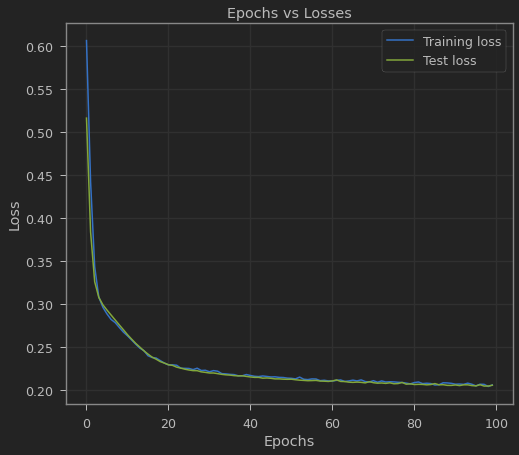

In [626]:
plt.title("Epochs vs Losses")
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [627]:
train_acc, test_acc = get_accuracy(annmodel, train_loader, test_loader)

print(f"Training Acc : {train_acc} | Test Acc : {test_acc}")

Training Acc : 0.9219650205761316 | Test Acc : 0.9228988603988604
